# Online Retail Company Customer Analysis

## Created By - Pradip Bera


### Perform customer segmentation using RFM analysis

#### Problem Statement: -

	It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value. Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).
    
#### Approach: -

    Following pointers will covered for solve this buisness problem.   




Step 1.	Perform a preliminary data inspection and Data cleaning

    a.	Check for missing data and formulate apt strategy to treat them.
    b.	Are there any duplicate data records? Remove them if present.
    c.	Perform Descriptive analytics on the given data.
    
Step 2.	Cohort Analysis: A cohort is a group of subjects who share a defining characteristic. We can observe how a cohort behaves across time and compare it to other cohorts. 

    a.	Create month cohorts and analyse active  customers for each cohort.
    b.	Also Analyse the retention rate of customers. Comment.
    
Step 3.	Build a RFM model – Recency Frequency and Monetary based on their behaviour.
            Recency is about when was the last order of a customer. It means the number of days since a customer made the last 
      purchase. If it’s a case for a website or an app, this could be interpreted as the last visit day or the last login time.
            Frequency is about the number of purchase in a given period. It could be 3 months, 6 months or 1 year. So we can 
      understand this value as for how often or how many a customer used the product of a company. The bigger the value is, the 
      more engaged the customers are. Could we say them as our VIP? Not necessary. Cause we also have to think about how much 
      they actually paid for each purchase, which means monetary value.
            Monetary is the total amount of money a customer spent in that given period. Therefore big spenders will be 
      differentiated with other customers such as MVP or VIP.
            
    a.	Calculate RFM metrics.
        i.   Recency as the time in no. of days since last transaction
        ii.  Frequency as  count of purchases done 
        iii. Monetary value  as total amount spend 
    b.	Build RFM Segments.
        i.	Give Recency Frequency and Monetary scores individually by dividing them in to quartiles.
            (Note: Rate "Recency" for customer who have been active more recently better than the less recent customer,
            because each company wants its customers to be recent. Rate "Frequency" and "Monetary Value" higher label 
            because we want Customer to spend more money and visit more often.) 
        ii.	Combine three ratings to get a RFM segment (as strings)
        iii.Get the RFM score by adding up the three ratings.
    c.	Analyse the RFM Segments by summarizing them and comment on the findings.
    
Step 4.	Create clusters using k means clustering algorithm.

    a.	Prepare the data for the algorithm.
        i.	If the data is Un Symmetrically distributed, manage the skewness with appropriate transformation.
        ii.	Standardize / scale the data.
    b.	Decide the optimum number of clusters to be formed
    c.	Analyse these clusters and comment on the results.
    
Step 5.	Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following: 

    a)	Country-wise analysis to demonstrate Average spend. Use a bar chart show monthly figures.
    b)	Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold.
    c)	Bar graph to show the count of orders Vs. hours throughout the day. What are the peak hours per your chart?
    d)	Plot the distribution of RFM values using histogram and frequency-charts.
    e)	Plot error(cost) vs no of clusters selected
    f)	 Visualize to compare the RFM values of the clusters using heatmap



## Data Cleaning: 

### 1.Perform a preliminary data inspection and data cleaning 

In [12]:
# Import require libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [13]:
pwd()

'C:\\Users\\pradi\\OneDrive\\Desktop\\Capstone Project\\Project 3'

In [14]:
# Import Dataset
retail_dataset = pd.read_excel('Online_Retail.xlsx')

In [15]:
# View first few records
retail_dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [16]:
# View last few records
retail_dataset.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [17]:
# Understand the datatypes of dataset  
retail_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [18]:
# Understatnd the statistical information of dataset
retail_dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


#### a. Check for missing data and formulate an apt strategy to treat them

In [19]:
# Check missing data in dataset
retail_dataset.isna().sum() 

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
# Drop missing data
retail_dataset_cleaned = retail_dataset.dropna(subset=['CustomerID'])
retail_dataset_cleaned.shape

(406829, 8)

In [21]:
# Check missing data in dataset
retail_dataset_cleaned.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### b. Remove duplicate data records

In [22]:
# Check duplicate records
retail_dataset_cleaned.duplicated(subset=['InvoiceNo','StockCode','CustomerID'], keep='first').sum()

10148

Dupplicate records are not useful for our analysis. As it will wasting our system resources and not useful for accurate prediction of customer segmentation. So we drop it.

In [23]:
# Drop dupplicate records
retail_dataset_cleaned.drop_duplicates(subset=['InvoiceNo','StockCode','CustomerID'], keep='first')
retail_dataset_cleaned.shape

(406829, 8)

In [24]:
# Cancelled orders are also the duplicate order. So, we drop it also.
retail_dataset_cleaned = retail_dataset_cleaned[retail_dataset_cleaned['Quantity']>0]   
retail_dataset_cleaned.shape

(397924, 8)

#### c. Perform descriptive analytics on the given data

In [25]:
retail_dataset.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [26]:
retail_dataset_cleaned.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [27]:
import pandas_profiling
pandas_profiling.ProfileReport(retail_dataset_cleaned)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

After data cleaning 

In [18]:
print("Summary Before EDA..")
#exploring the unique values of each attribute
print("Number of transactions: ", retail_dataset['InvoiceNo'].nunique())
print("Number of products bought: ",retail_dataset['StockCode'].nunique())
print("Number of customers:", retail_dataset['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_dataset['CustomerID'].isnull().sum() * 100 / len(retail_dataset),2),"%" )

print("Summary After EDA..")
#exploring the unique values of each attribute
print("Number of transactions: ", retail_dataset_cleaned['InvoiceNo'].nunique())
print("Number of products bought: ",retail_dataset_cleaned['StockCode'].nunique())
print("Number of customers:", retail_dataset_cleaned['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(retail_dataset_cleaned['CustomerID'].isnull().sum() * 100 / len(retail_dataset_cleaned),2),"%" )

Summary Before EDA..
Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers NA:  24.93 %
Summary After EDA..
Number of transactions:  18536
Number of products bought:  3665
Number of customers: 4339
Percentage of customers NA:  0.0 %


In [19]:
# Export this dataset for tableau dashboard creation
#retail_dataset_cleaned.to_excel(r'C:\Users\pradi\OneDrive\Desktop\Capstone Project\Project 3\retail_dataset_cleaned.xlsx')

In [274]:
# top_15_products=retail_dataset_cleaned.groupby(by='Description',as_index=False)['Quantity'].sum()

In [275]:
#top_15_products.to_excel(r'C:\Users\pradi\OneDrive\Desktop\Capstone Project\Project 3\Top Selling Products.xlsx')

## Data Transformation:

### 2. Perform cohort analysis

A cohort is a group of subjects that share a defining characteristic. Here we create cohort to analyis customer retaintion rate.

#### a. Create month cohorts and analyze active customers for each cohort. 

In [19]:
import datetime as dt

In [20]:
# 
def get_month(x): return dt.datetime(x.year, x.month, 1)
retail_dataset_cleaned['InvoiceMonth'] = retail_dataset_cleaned['InvoiceDate'].apply(get_month)
grouping = retail_dataset_cleaned.groupby('CustomerID')['InvoiceMonth']
retail_dataset_cleaned['CohortMonth'] = grouping.transform('min')

In [21]:
def get_date_int(retail_dataset_cleaned, column):
    year = retail_dataset_cleaned[column].dt.year
    month = retail_dataset_cleaned[column].dt.month
    day = retail_dataset_cleaned[column].dt.day
    return year, month, day

In [22]:
invoice_year, invoice_month, invoice_day = get_date_int(retail_dataset_cleaned, 'InvoiceMonth')
cohort_year, cohort_month, cohort_day = get_date_int(retail_dataset_cleaned, 'CohortMonth')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

retail_dataset_cleaned['CohortIndex'] = years_diff * 12 + months_diff + 1

retail_dataset_cleaned.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,2011-08-01,5
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,2011-08-01,5
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,2011-08-01,5
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-01,2011-08-01,5


In [23]:
# Grouped based on cohort month and cohort index
grouping = retail_dataset_cleaned.groupby(['CohortMonth', 'CohortIndex'])

# Grouped with cohort month and cohort index by customer id by applying counting unique items in cusomer id 
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)

# Reset index
cohort_data = cohort_data.reset_index()

# Apply Pivot to create cohorts of unique customers in each month 
cohort_counts = cohort_data.pivot(index='CohortMonth',
                                 columns='CohortIndex',
                                 values='CustomerID')

In [24]:
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### b. Analyze the retention rate of customers.

In [25]:
# Calculate retention
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention.index=retention.index.date

In [26]:
retention.round(2)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
2010-12-01,1.0,0.37,0.32,0.38,0.36,0.40,0.36,0.35,0.35,0.40,0.37,0.50,0.27
2011-01-01,1.0,0.22,0.27,0.23,0.32,0.29,0.25,0.24,0.30,0.33,0.36,0.12,NaN
2011-02-01,1.0,0.19,0.19,0.28,0.27,0.25,0.25,0.28,0.25,0.31,0.07,NaN,NaN
2011-03-01,1.0,0.15,0.25,0.20,0.22,0.17,0.27,0.23,0.28,0.09,NaN,NaN,NaN
2011-04-01,1.0,0.21,0.20,0.21,0.20,0.23,0.22,0.26,0.07,NaN,NaN,NaN,NaN
2011-05-01,1.0,0.19,0.17,0.17,0.21,0.23,0.26,0.10,NaN,NaN,NaN,NaN,NaN
2011-06-01,1.0,0.17,0.16,0.26,0.23,0.33,0.10,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,1.0,0.18,0.21,0.22,0.27,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,1.0,0.21,0.25,0.24,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-01,1.0,0.23,0.30,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


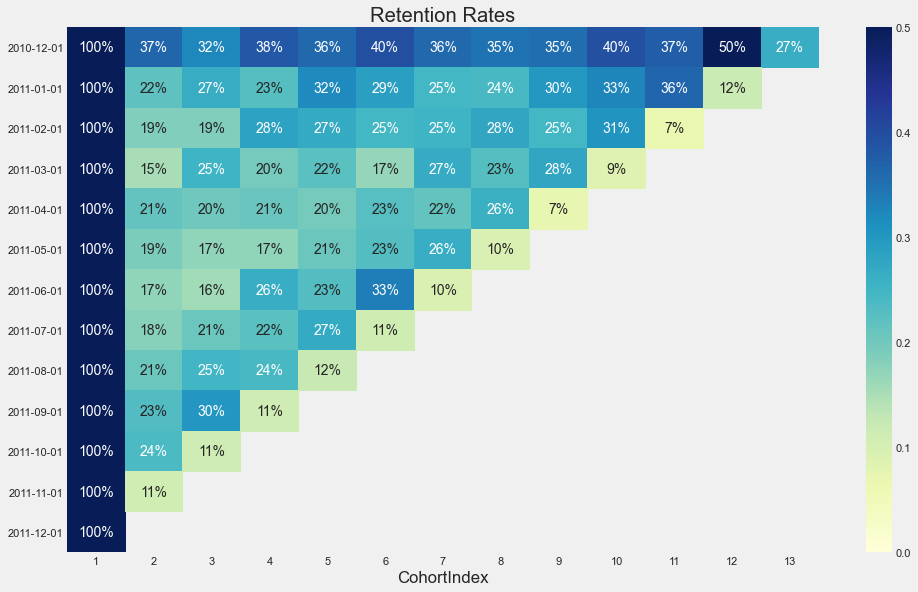

In [29]:
sns.set()
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,9))
plt.title('Retention Rates')

sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin= 0.0,
           vmax=0.5,
           cmap='YlGnBu')
plt.show()

## Data Modeling :

### 1. Build a RFM (Recency Frequency Monetary) model.

In [30]:
#last date available in our dataset
retail_dataset_cleaned['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

In [31]:
now = dt.date(2011,12,9)
print(now)

2011-12-09


In [32]:
# Creating new column of date in retail dataset which is taken from invoice date
retail_dataset_cleaned['date'] = pd.DatetimeIndex(retail_dataset_cleaned['InvoiceDate']).date

In [33]:
retail_dataset_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01


#### Recency Calculation 

In [34]:
# New dataset created by applying groupby function in CustomerID column to get last date of purchase
recency_df = retail_dataset_cleaned.groupby(by='CustomerID' ,as_index=False)['date'].max()

In [35]:
# Set the column name
recency_df.rename(columns={'date': 'LastPurchaseDate'}, inplace=True)

In [36]:
# View Dataset
recency_df.head(10)

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02
5,12352.0,2011-11-03
6,12353.0,2011-05-19
7,12354.0,2011-04-21
8,12355.0,2011-05-09
9,12356.0,2011-11-17


In [37]:
# Calculate recency by substracting purchase date from present day (for this dataset present day is 09.12.2012)
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)

In [38]:
# View dataset top 5 row
recency_df.head(10)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
5,12352.0,2011-11-03,36
6,12353.0,2011-05-19,204
7,12354.0,2011-04-21,232
8,12355.0,2011-05-09,214
9,12356.0,2011-11-17,22


In [39]:
# We don't need date column
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)

In [40]:
# View top 5 row of dataset to check date column droped or not
recency_df.head(10)

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310
5,12352.0,36
6,12353.0,204
7,12354.0,232
8,12355.0,214
9,12356.0,22


#### Frequency Calculation 

In [41]:
# Create a copy of retail dataset for frequency calculation
retail_dataset_copy=retail_dataset_cleaned

In [42]:
retail_dataset_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)

In [43]:
retail_dataset_copy.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France,2010-12-01,2010-12-01,1,2010-12-01
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
47,536372,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
65,536374,21258,VICTORIAN SEWING BOX LARGE,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01


Now in this dataset we count the invoice no by applying groupby function in customer id column.

In [44]:
frequency_df = retail_dataset_copy.groupby(by = 'CustomerID',as_index=False )['InvoiceNo'].count()

In [45]:
frequency_df.head(10)

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
5,12352.0,8
6,12353.0,1
7,12354.0,1
8,12355.0,1
9,12356.0,3


In [46]:
frequency_df.rename(columns={'InvoiceNo':'Frequency'},inplace=True)

In [47]:
frequency_df.head(10)

,CustomerID,Frequency
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
5,12352.0,8
6,12353.0,1
7,12354.0,1
8,12355.0,1
9,12356.0,3


#### Monetary

In [48]:
retail_dataset_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01


In [49]:
retail_dataset_cleaned['TotalCost']=retail_dataset_cleaned['Quantity']*retail_dataset_cleaned['UnitPrice']

In [50]:
retail_dataset_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,date,TotalCost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,15.30
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,54.08
21,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,25.50
25,536369,21756,BATH BUILDING BLOCK WORD,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,2010-12-01,2010-12-01,1,2010-12-01,17.85


In [51]:
monetary_df = retail_dataset_cleaned.groupby(by= 'CustomerID', as_index=False)['TotalCost'].sum()

In [52]:
monetary_df.head(10)

,CustomerID,TotalCost
0,12346.0,77183.60
1,12347.0,163.16
2,12348.0,331.36
3,12349.0,15.00
4,12350.0,25.20
5,12352.0,536.30
6,12353.0,19.90
7,12354.0,20.80
8,12355.0,30.00
9,12356.0,153.90


In [53]:
monetary_df.rename(columns={'TotalCost':'Monetary'},inplace=True)

In [54]:
monetary_df.head(10)

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,163.16
2,12348.0,331.36
3,12349.0,15.00
4,12350.0,25.20
5,12352.0,536.30
6,12353.0,19.90
7,12354.0,20.80
8,12355.0,30.00
9,12356.0,153.90


### 2. Calculate RFM metrics. 

In [55]:
new_df = recency_df.merge(frequency_df, on='CustomerID')
new_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,1
1,12347.0,2,7
2,12348.0,75,4
3,12349.0,18,1
4,12350.0,310,1


In [56]:
rfm_df=new_df.merge(monetary_df, on='CustomerID')
rfm_df.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,7,163.16
2,12348.0,75,4,331.36
3,12349.0,18,1,15.00
4,12350.0,310,1,25.20
5,12352.0,36,8,536.30
6,12353.0,204,1,19.90
7,12354.0,232,1,20.80
8,12355.0,214,1,30.00
9,12356.0,22,3,153.90


In [57]:
rfm_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 0 to 4338
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  4339 non-null   float64
 1   Recency     4339 non-null   int64  
 2   Frequency   4339 non-null   int64  
 3   Monetary    4339 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 169.5 KB


### 3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

In [58]:
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)

In [59]:
rfm_df.head(10)

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,163.16
12348.0,75,4,331.36
12349.0,18,1,15.00
12350.0,310,1,25.20
12352.0,36,8,536.30
12353.0,204,1,19.90
12354.0,232,1,20.80
12355.0,214,1,30.00


In [60]:
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,17.700
0.50,50.0,2.0,47.000
0.75,141.5,5.0,130.045


In [61]:
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.5},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 17.700000000000003, 0.5: 47.0, 0.75: 130.04500000000002}}

In [62]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def R_Score(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
# Arguments (x = value, p = recency, monetary_value, frequency, d = quartiles dict)
def FM_Score(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [63]:
#create rfm segmentation table
rfm_segmentation = rfm_df
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(R_Score, args=('Recency',quantiles,))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FM_Score, args=('Frequency',quantiles,))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FM_Score, args=('Monetary',quantiles,))

In [64]:
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12347.0,2,7,163.16,4,4,4
12348.0,75,4,331.36,2,3,4
12349.0,18,1,15.00,3,1,1
12350.0,310,1,25.20,1,1,2


#### b1. Combine three ratings to get a RFM segment (as strings).

Now that we have the score of each customer, we can represent our customer segmentation. First, we need to combine the scores (R_Quartile, F_Quartile,M_Quartile) together.

In [65]:
rfm_segmentation['RFM Segment'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Segment
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12347.0,2,7,163.16,4,4,4,444
12348.0,75,4,331.36,2,3,4,234
12349.0,18,1,15.00,3,1,1,311
12350.0,310,1,25.20,1,1,2,112


#### b2. Get the RFM score by adding up the three ratings.

In [66]:
rfm_segmentation['RFM_Score'] = rfm_segmentation[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis = 1)
rfm_segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6
12347.0,2,7,163.16,4,4,4,444,12
12348.0,75,4,331.36,2,3,4,234,9
12349.0,18,1,15.00,3,1,1,311,5
12350.0,310,1,25.20,1,1,2,112,4


#### b3. Analyze the RFM segments by summarizing them and comment on the findings.

## Rating Customer based upon the RFM score

#### RFM score >11 : Best Customer
#### 11> RFM score > 8 : Loyal Customer
#### 8> RFM score >5 : Medium value customer
#### 5> RFM score >2 : About to Sleep
#### RFM score <2 :Lost Customer

In [67]:
rfm_segmentation["Customer_segment"] = np.where(rfm_segmentation['RFM_Score'] >10, "Best Customer",
                                                (np.where(rfm_segmentation['RFM_Score'] > 8,"Loyal Customer",
                                                          (np.where(rfm_segmentation['RFM_Score'] > 6,"Medium Value Customer",
                                                                    (np.where(rfm_segmentation['RFM_Score'] > 4,'About to Sleep',
                                                                              'Lost Customer')))))))
rfm_segmentation[['RFM_Score', 'Customer_segment']].head(10)


,RFM_Score,Customer_segment
CustomerID,,
12346.0,6,About to Sleep
12347.0,12,Best Customer
12348.0,9,Loyal Customer
12349.0,5,About to Sleep
12350.0,4,Lost Customer
12352.0,11,Best Customer
12353.0,4,Lost Customer
12354.0,4,Lost Customer
12355.0,4,Lost Customer


In [68]:
rfm_df.head(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Segment,RFM_Score,Customer_segment
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6,About to Sleep
12347.0,2,7,163.16,4,4,4,444,12,Best Customer
12348.0,75,4,331.36,2,3,4,234,9,Loyal Customer
12349.0,18,1,15.00,3,1,1,311,5,About to Sleep
12350.0,310,1,25.20,1,1,2,112,4,Lost Customer
12352.0,36,8,536.30,3,4,4,344,11,Best Customer
12353.0,204,1,19.90,1,1,2,112,4,Lost Customer
12354.0,232,1,20.80,1,1,2,112,4,Lost Customer
12355.0,214,1,30.00,1,1,2,112,4,Lost Customer


In [69]:
rfm_df[rfm_df['Customer_segment']=='About to Sleep']

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Segment,RFM_Score,Customer_segment
CustomerID,,,,,,,,,
12346.0,325,1,77183.60,1,1,4,114,6,About to Sleep
12349.0,18,1,15.00,3,1,1,311,5,About to Sleep
12357.0,33,1,19.80,3,1,2,312,6,About to Sleep
12367.0,4,1,10.20,4,1,1,411,6,About to Sleep
12374.0,25,1,13.05,3,1,1,311,5,About to Sleep
...,...,...,...,...,...,...,...,...,...
18255.0,89,1,30.00,2,1,2,212,5,About to Sleep
18265.0,72,2,42.80,2,2,2,222,6,About to Sleep
18268.0,134,1,25.50,2,1,2,212,5,About to Sleep


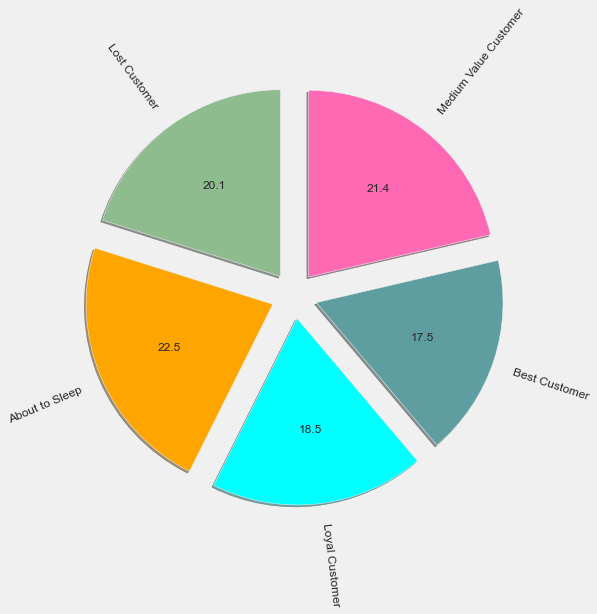

In [70]:
colors  = ( "darkseagreen", "orange", "cyan", "cadetblue", "hotpink",)
explodes = [0.25, 0.25, 0.25, 0.25, 0.25]

rfm_segmentation["Customer_segment"].value_counts(sort=False).plot.pie(colors=colors,
                                                 textprops={'fontsize': 12}, 
                                                 autopct = '%4.1f',
                                                 startangle= 90, 
                                                 radius =2, 
                                                 rotatelabels=True,
                                                 shadow = True, 
                                                 explode = explodes)
plt.ylabel("");

In [76]:
#rfm_segmentation.to_excel(r'C:\Users\pradi\OneDrive\Desktop\Capstone Project\Project 3\rfm_segmentation.xlsx')

## Data Modeling :

### 1. Create clusters using k-means clustering algorithm .

#### a. Prepare the data for the algorithm . If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.  

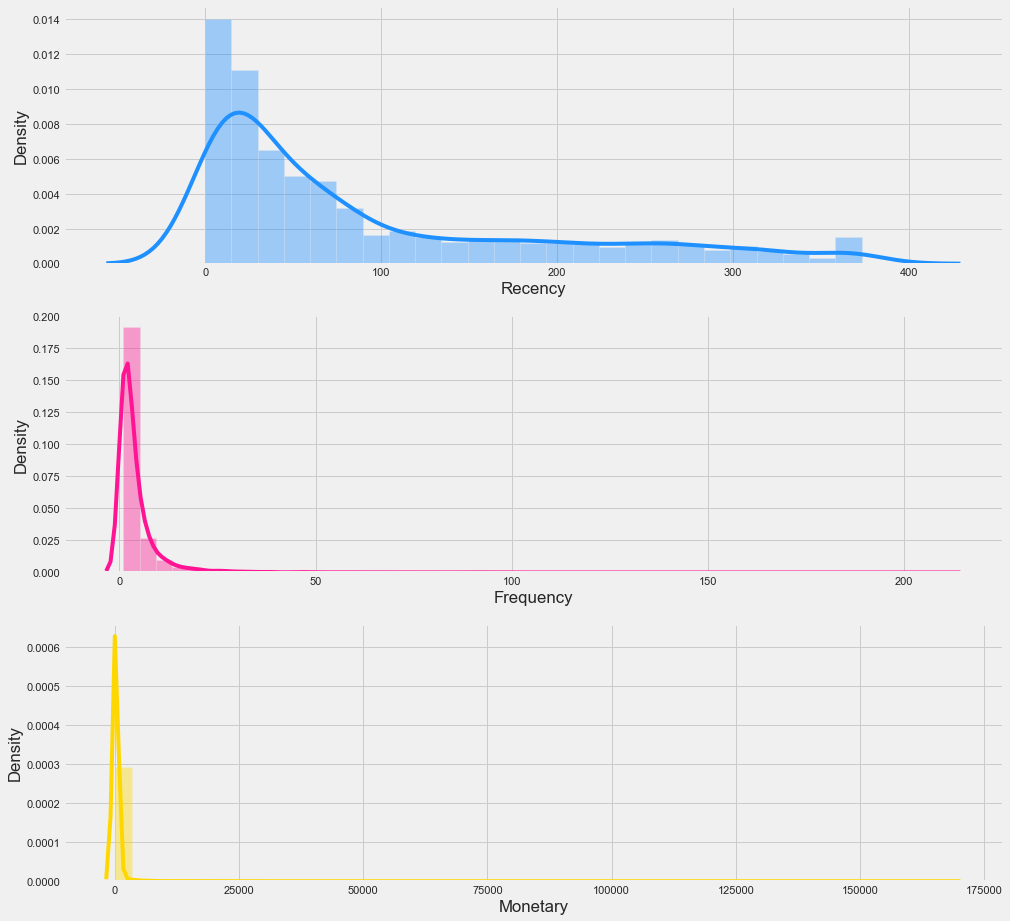

In [71]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(rfm_segmentation.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(rfm_segmentation.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(rfm_segmentation.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
plt.show();

In [72]:
# Let's describe the table to see if there are any negative values
rfm_segmentation.describe()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,92.041484,4.271952,296.761113,2.506107,2.319889,2.496889,7.322885
std,100.007757,7.705493,3128.293416,1.122159,1.143869,1.120938,2.806444
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,17.000000,1.000000,17.700000,1.500000,1.000000,1.000000,5.000000
50%,50.000000,2.000000,47.000000,3.000000,2.000000,2.000000,7.000000
75%,141.500000,5.000000,130.045000,4.000000,3.000000,3.500000,10.000000
max,373.000000,210.000000,168471.250000,4.000000,4.000000,4.000000,12.000000


In [73]:
rfm_table=rfm_segmentation[['Recency','Frequency','Monetary']]

In [74]:
rfm_table.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,7,163.16
12348.0,75,4,331.36
12349.0,18,1,15.00
12350.0,310,1,25.20


In [75]:
# Transform the data before K-Means clustering
from sklearn.preprocessing import StandardScaler

# Taking log first because normalization forces data for negative values
#log_df = np.log(rfm_table_scaled)

# Normalize the data for uniform averages and means in the distribution.
scaler = StandardScaler()
normal_df = scaler.fit_transform(rfm_table)
normal_df = pd.DataFrame(data=normal_df, index=rfm_table.index, columns=rfm_table.columns)

In [76]:
normal_df.describe()

,Recency,Frequency,Monetary
count,4.339000e+03,4.339000e+03,4.339000e+03
mean,-3.510546e-17,3.231071e-16,4.992677e-18
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-9.204495e-01,-4.246749e-01,-9.487451e-02
25%,-7.504431e-01,-4.246749e-01,-8.921582e-02
50%,-4.204307e-01,-2.948824e-01,-7.984862e-02
75%,4.946038e-01,9.449517e-02,-5.329913e-02
max,2.809691e+00,2.670196e+01,5.376538e+01


In [77]:
rfm_segmentation.describe()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM_Score
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,92.041484,4.271952,296.761113,2.506107,2.319889,2.496889,7.322885
std,100.007757,7.705493,3128.293416,1.122159,1.143869,1.120938,2.806444
min,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,17.000000,1.000000,17.700000,1.500000,1.000000,1.000000,5.000000
50%,50.000000,2.000000,47.000000,3.000000,2.000000,2.000000,7.000000
75%,141.500000,5.000000,130.045000,4.000000,3.000000,3.500000,10.000000
max,373.000000,210.000000,168471.250000,4.000000,4.000000,4.000000,12.000000


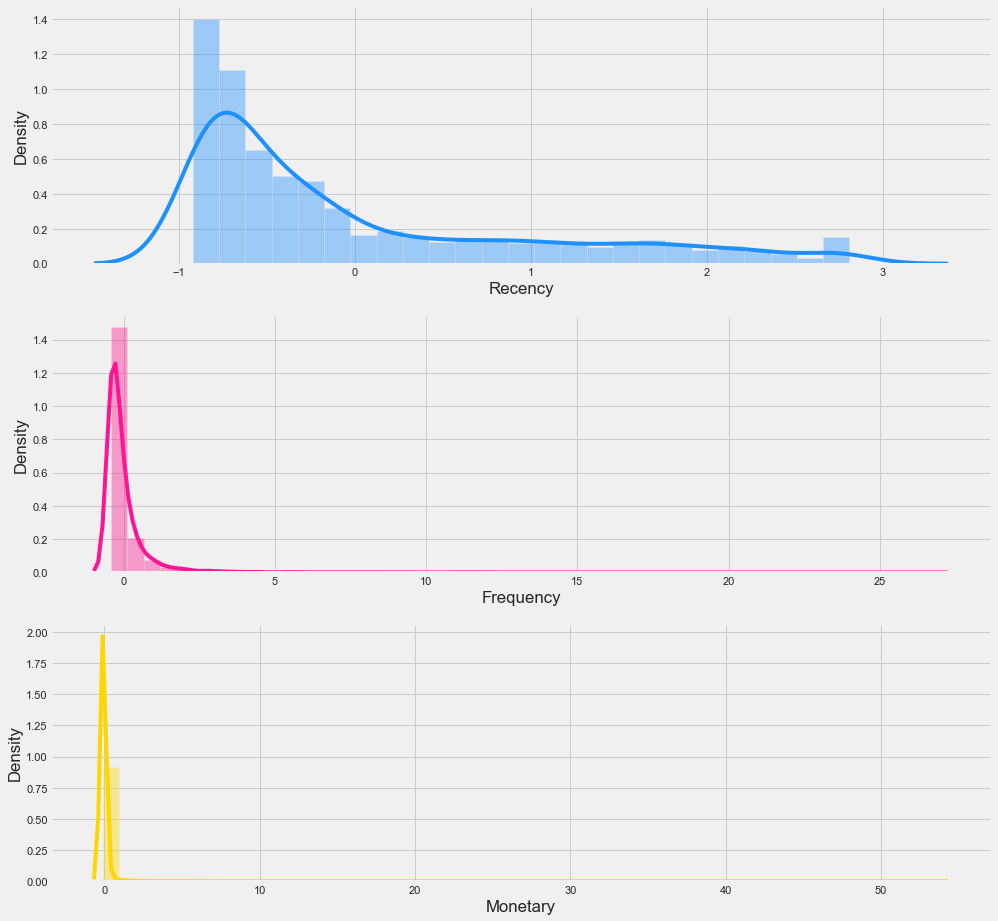

In [78]:
# plot again on the transformed RFM data
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_df.Recency , color="dodgerblue", ax=axes[0], axlabel='Recency')
sns.distplot(normal_df.Frequency , color="deeppink", ax=axes[1], axlabel='Frequency')
sns.distplot(normal_df.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
plt.show();

#### b. Decide the optimum number of clusters to be formed.

We can observe that the means & averages are approximately uniformed now in each distribution. Now the data is apt for unsupervised algo i.e. K-Means. Lets try to find number of appropriate clusters to divide customers as per there spending pattern with **elbow** method first

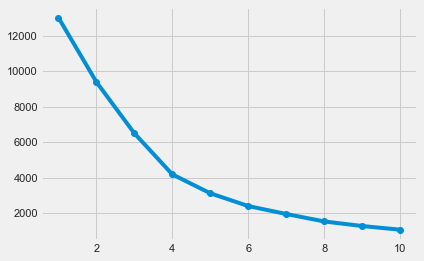

In [79]:
# find WCSS
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(normal_df)
    wcss.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(1,11),wcss,marker='o');

From the elbow graph, it seems that good number of cluster would be 4 as after that, its a smooth curve i.e. no change of orientation. 

In [80]:
kmeans = KMeans(n_clusters=4, random_state=1, init='k-means++')
kmeans.fit(normal_df)
cluster_labels = kmeans.labels_

In [81]:
kmeans

KMeans(n_clusters=4, random_state=1)

In [82]:
print(f"Shape of cluster label array is {cluster_labels.shape}")
print(f"Shape of RFM segment dataframe is {rfm_segmentation.shape}")

Shape of cluster label array is (4339,)
Shape of RFM segment dataframe is (4339, 9)


In [83]:
# Assign the clusters as column to each customer
Cluster_table = rfm_segmentation.assign(Cluster = cluster_labels)

In [84]:
# Check counts of records assigned to different clusters
Cluster_table.Cluster.value_counts()

0    3236
1    1080
3      21
2       2
Name: Cluster, dtype: int64

In [95]:
Cluster_table.to_excel(r'C:\Users\pradi\OneDrive\Desktop\Capstone Project\Project 3\K-means Cluster.xlsx')

In [85]:
Cluster_table.sample(10)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Segment,RFM_Score,Customer_segment,Cluster
CustomerID,,,,,,,,,,
18228.0,56,2,50.28,2,2,3,223,7,Medium Value Customer,0
18097.0,7,6,206.88,4,4,4,444,12,Best Customer,0
15104.0,196,2,56.40,1,2,3,123,6,About to Sleep,1
12380.0,21,4,220.72,3,3,4,334,10,Loyal Customer,0
14566.0,110,1,358.00,2,1,4,214,7,Medium Value Customer,0
14413.0,362,1,0.95,1,1,1,111,3,Lost Customer,1
13684.0,285,1,3.00,1,1,1,111,3,Lost Customer,1
13334.0,82,3,47.80,2,3,3,233,8,Medium Value Customer,0
13363.0,17,2,34.50,4,2,2,422,8,Medium Value Customer,0


In [86]:
Cluster_table[Cluster_table.Cluster == 3].sample(20)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Segment,RFM_Score,Customer_segment,Cluster
CustomerID,,,,,,,,,,
13694.0,3,50,7519.06,4,4,4,444,12,Best Customer,3
15061.0,3,48,6206.16,4,4,4,444,12,Best Customer,3
15311.0,0,91,4709.93,4,4,4,444,12,Best Customer,3
15039.0,9,47,1269.27,4,4,4,444,12,Best Customer,3
16029.0,38,63,24384.92,3,4,4,344,11,Best Customer,3
14156.0,9,55,6010.73,4,4,4,444,12,Best Customer,3
17949.0,1,45,29999.69,4,4,4,444,12,Best Customer,3
13089.0,2,97,5389.39,4,4,4,444,12,Best Customer,3
12748.0,0,210,3841.31,4,4,4,444,12,Best Customer,3


In [87]:
Cluster_table[Cluster_table.Cluster == 2].sample(2)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Segment,RFM_Score,Customer_segment,Cluster
CustomerID,,,,,,,,,,
16446.0,0,2,168471.25,4,2,4,424,10,Loyal Customer,2
12346.0,325,1,77183.60,1,1,4,114,6,About to Sleep,2


In [95]:
Cluster_table[Cluster_table.Cluster == 1].sample(20)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Segment,RFM_Score,Customer_segment,Cluster
CustomerID,,,,,,,,,,
12559.0,310,2,90.10,1,2,3,123,6,About to Sleep,1
13922.0,351,1,17.70,1,1,1,111,3,Lost Customer,1
15019.0,266,1,0.85,1,1,1,111,3,Lost Customer,1
15623.0,141,1,17.70,2,1,1,211,4,Lost Customer,1
15881.0,312,5,58.55,1,3,3,133,7,Medium Value Customer,1
15109.0,245,1,15.00,1,1,1,111,3,Lost Customer,1
16567.0,194,2,32.85,1,2,2,122,5,About to Sleep,1
13973.0,287,1,15.00,1,1,1,111,3,Lost Customer,1
14311.0,242,1,10.20,1,1,1,111,3,Lost Customer,1


In [96]:
Cluster_table[Cluster_table.Cluster == 0].sample(20)

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFM Segment,RFM_Score,Customer_segment,Cluster
CustomerID,,,,,,,,,,
14379.0,44,2,35.85,3,2,2,322,7,Medium Value Customer,0
17107.0,33,6,545.10,3,4,4,344,11,Best Customer,0
15261.0,135,1,4.56,2,1,1,211,4,Lost Customer,0
16333.0,7,22,14418.96,4,4,4,444,12,Best Customer,0
16871.0,22,6,198.80,3,4,4,344,11,Best Customer,0
18135.0,29,5,292.99,3,3,4,334,10,Loyal Customer,0
17830.0,1,3,66.00,4,3,3,433,10,Loyal Customer,0
17636.0,19,1,15.00,3,1,1,311,5,About to Sleep,0
17420.0,50,3,60.65,3,3,3,333,9,Loyal Customer,0


# Data Reporting

### 1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

#### a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

In [1]:
%%HTML

<div class='tableauPlaceholder' id='viz1652034274532' style='position: relative'><noscript><a href='#'><img alt='Country wise monthly total spent ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone_16517877104750&#47;Countrywisemonthlytotalspent&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstone_16517877104750&#47;Countrywisemonthlytotalspent' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone_16517877104750&#47;Countrywisemonthlytotalspent&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1652034274532');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

In [2]:
%%HTML

<div class='tableauPlaceholder' id='viz1652042544820' style='position: relative'><noscript><a href='#'><img alt='Most Ordered Top 15 Products ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone_16517877104750&#47;Top15&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstone_16517877104750&#47;Top15' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone_16517877104750&#47;Top15&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1652042544820');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### c. Bar graph to show the count of orders vs. hours throughout the day

In [3]:
%%HTML
<div class='tableauPlaceholder' id='viz1652043207509' style='position: relative'><noscript><a href='#'><img alt='Count of orders vs. hours throughout the day ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone_16517877104750&#47;Orderhour&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstone_16517877104750&#47;Orderhour' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone_16517877104750&#47;Orderhour&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1652043207509');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### d. Plot the distribution of RFM values using histogram and frequency charts

In [4]:
%%HTML
<div class='tableauPlaceholder' id='viz1652043851692' style='position: relative'><noscript><a href='#'><img alt='RFM Values Distribution ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone_16517877104750&#47;RFMdistribution&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstone_16517877104750&#47;RFMdistribution' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone_16517877104750&#47;RFMdistribution&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1652043851692');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### e. Plot error (cost) vs. number of clusters selected

In [5]:
%%HTML
<div class='tableauPlaceholder' id='viz1652076147756' style='position: relative'><noscript><a href='#'><img alt='Cost  vs Cluster ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone_16517877104750&#47;costcluster&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstone_16517877104750&#47;costcluster' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone_16517877104750&#47;costcluster&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1652076147756');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### f. Visualize to compare the RFM values of the clusters using heatmap

In [6]:
%%HTML
<div class='tableauPlaceholder' id='viz1652076057644' style='position: relative'><noscript><a href='#'><img alt='RFM vs Cluster ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone_16517877104750&#47;RFMCluster&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstone_16517877104750&#47;RFMCluster' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone_16517877104750&#47;RFMCluster&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1652076057644');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Final Dashboard

In [7]:
%%HTML
<div class='tableauPlaceholder' id='viz1652075918769' style='position: relative'><noscript><a href='#'><img alt='RFM Analysis Dashboard ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone_16517877104750&#47;RFMAnalysisDashboard&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='Capstone_16517877104750&#47;RFMAnalysisDashboard' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;Capstone_16517877104750&#47;RFMAnalysisDashboard&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1652075918769');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1620px';vizElement.style.height='2087px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1620px';vizElement.style.height='2087px';} else { vizElement.style.width='100%';vizElement.style.height='1927px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [7]:
%%HTML
<img src=https://www.thebalancecareers.com/thmb/BJkAIzHRPYluMoIJHVAP96INk7Y=/1885x1414/smart/filters:no_upscale()/GettyImages-185002046-5772f4153df78cb62ce1ad69.jpg"/>